# Project invisible PAD


In [113]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [114]:
def sizeandshow(plhldr):
    plt.imshow(plhldr)
    print(plhldr.shape)
    plt.show()
def describe(x):
    mu=np.mean(x)
    sig=np.std(x)
    #plt.hist(x,)
    print('mean',mu)
    print('sigma',sig)
    return mu,sig

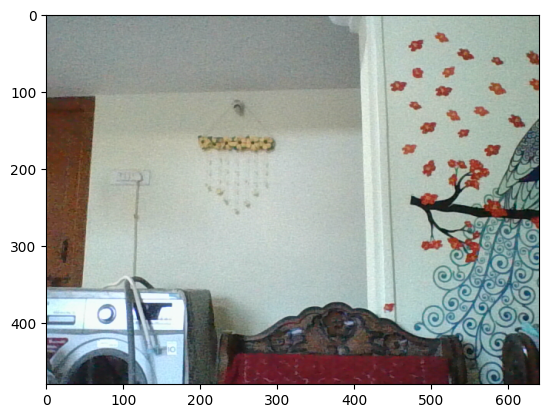

In [115]:
cap = cv2.VideoCapture(0)
time.sleep(2)
ret,sbg=cap.read(0)
sbg=cv2.cvtColor(sbg,cv2.COLOR_BGR2RGB)

cap.release()
plt.imshow(sbg)

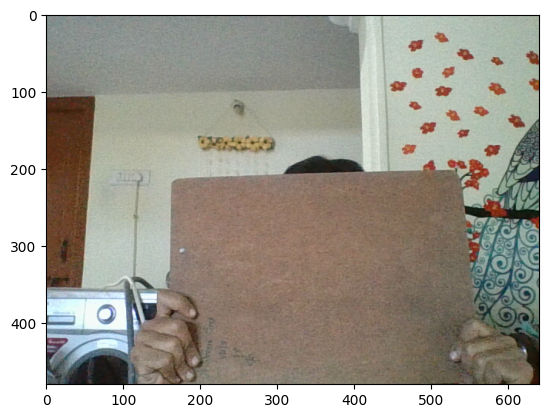

In [117]:
##reading from the webcam
cap = cv2.VideoCapture(0)
time.sleep(2)
ret,img=cap.read(0)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

cap.release()
plt.imshow(img)

### crop PAD roi and plot hsv histograms

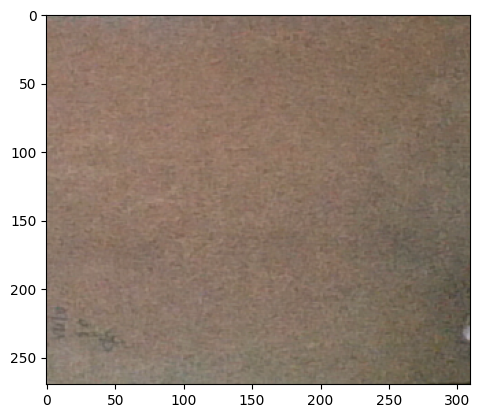

In [118]:
roi=img[210::,220:530]
plt.imshow(roi)

mean 13.610454002389487
sigma 4.949245206018189
mean 67.66864994026284
sigma 11.979989457455947
mean 135.32536439665472
sigma 13.717958801673788


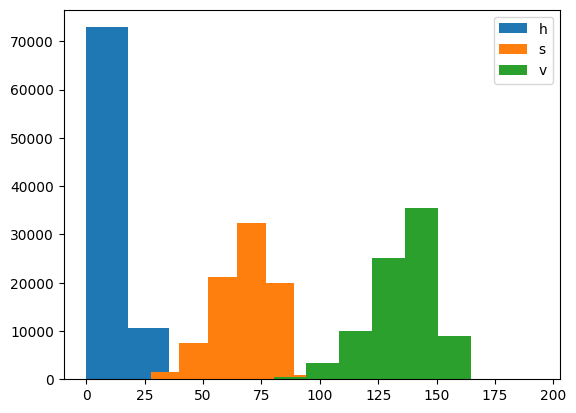

In [119]:
roi_hsv=cv2.cvtColor(roi,cv2.COLOR_RGB2HSV)
h= roi_hsv[:,:,0].flatten()
s= roi_hsv[:,:,1].flatten()
v= roi_hsv[:,:,2].flatten()
hm,hs=describe(h)
sm,ss=describe(s)
vm,vs=describe(v)
plt.hist(h,label='h')
plt.hist(s,label='s')
plt.hist(v,label='v')
plt.legend()
plt.show()


## static image
1. creat mask based on above histograms
2. from background image, extract masked portion.
3. from foregrounf grab inversemask portion.
4. add foreground and background

(480, 640, 3)


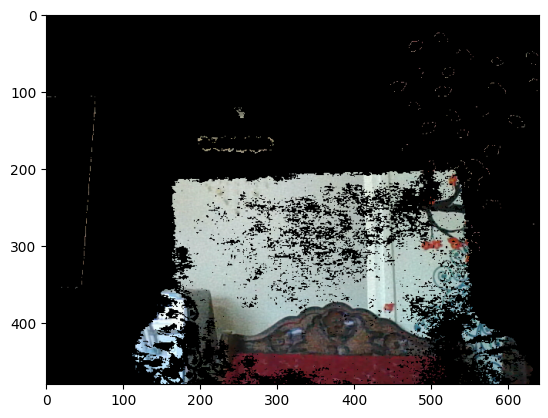

(480, 640, 3)


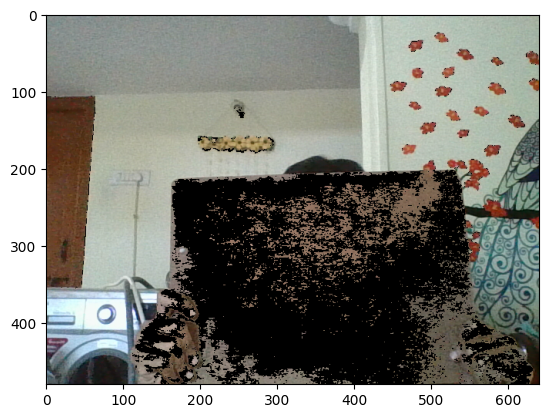

(480, 640, 3)


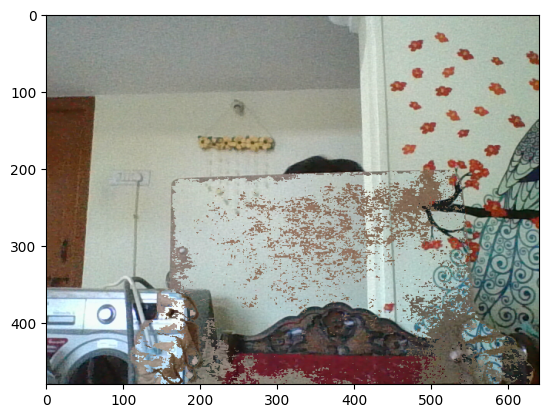

(480, 640)


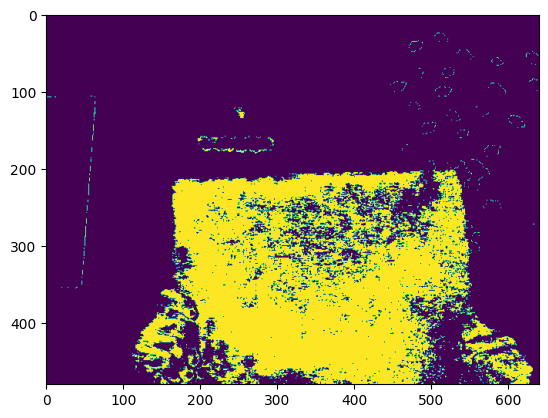

In [124]:
lower_bound= np.array([0,45,110])
upper_bound=np.array([30,80,165])
img_hsv=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
mask=cv2.inRange(img_hsv,lower_bound,upper_bound)
mask_inv=cv2.bitwise_not(mask)

foreground=cv2.bitwise_and(img,img,mask=mask_inv)
background= cv2.bitwise_and(sbg,sbg,mask=mask)
res=cv2.add(foreground,background)
sizeandshow(background)
sizeandshow(foreground)
sizeandshow(res)
sizeandshow(mask)


## realtime

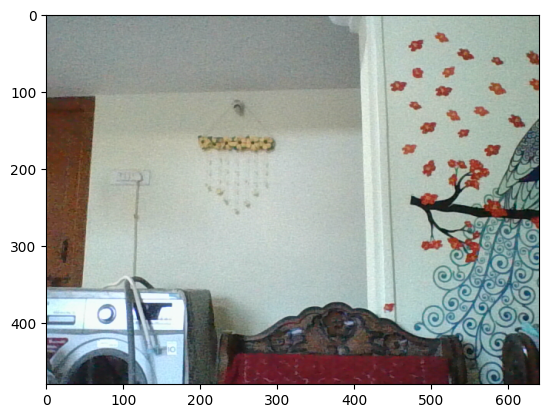

In [121]:
plt.imshow(sbg)

In [ ]:
cap = cv2.VideoCapture(0)
time.sleep(2)

lower_bound= np.array([0,45,110])
upper_bound=np.array([30,80,165])

## Read every frame from the webcam, until the camera is open
while (cap.isOpened()):
    
    ret, fg = cap.read()
    fg_hsv=cv2.cvtColor(fg,cv2.COLOR_BGR2HSV)
    mask=cv2.inRange(fg_hsv,lower_bound,upper_bound)
    mask_inv=cv2.bitwise_not(mask)
    
    foreground=cv2.bitwise_and(fg,fg,mask=mask_inv)
    background= cv2.bitwise_and(sbg,sbg,mask=mask)
    res=cv2.add(foreground,background)

    cv2.imshow('m1',mask)
    cv2.imshow('res',res)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()    